Libraries import

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

# Set some visualization styles
sns.set(style="whitegrid",palette="muted",font_scale=1.1)


In [3]:
# Step 2 load the datasets

train_df = pd.read_csv('data/train.csv')
test_df= pd.read_csv('data/test.csv')

In [4]:
# Displaying 5 rows 

print("Training Data")
train_df.head(5)

Training Data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Testing Data")
test_df.head(5)

Testing Data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Basic information about datasets

print("Train shape", train_df.shape)
print("Test shape", test_df.shape)

Train shape (1460, 81)
Test shape (1459, 80)


In [7]:
# check data type and missing values 

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Quick Statistical summary 
train_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# Step 4 : Checking missing values 

missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(train_df)) * 100 
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percent (%)': missing_percent})
missing_data.head(10)

,Missing Values,Percent (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945


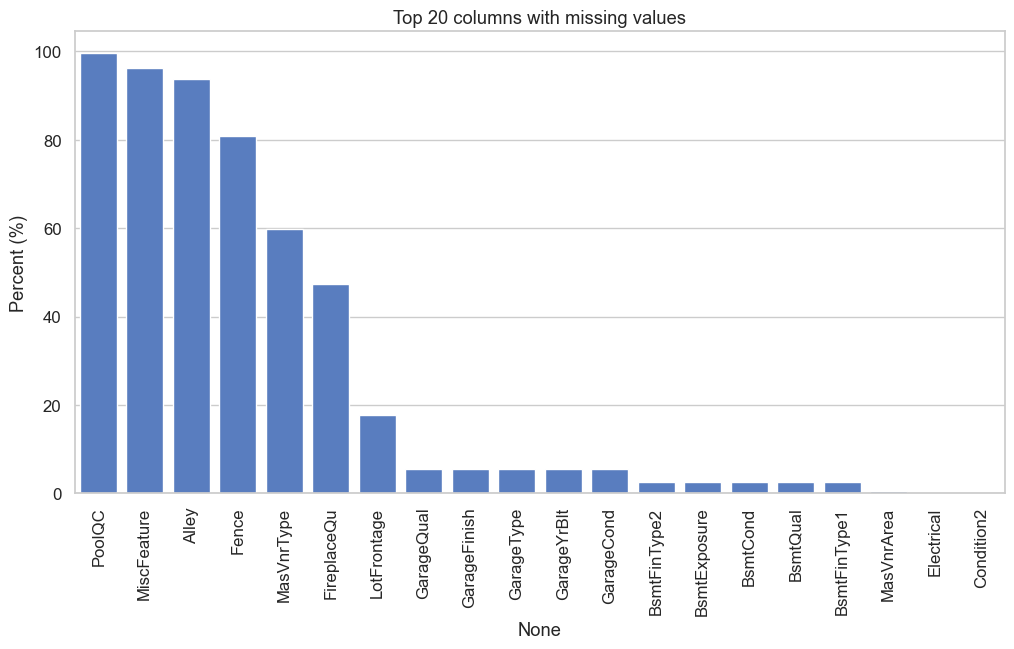

In [10]:
# Visualize top 20 columns 

plt.figure(figsize=(12,6))
sns.barplot(x=missing_data.head(20).index, y=missing_data['Percent (%)'].head(20))
plt.xticks(rotation=90)
plt.title("Top 20 columns with missing values")
plt.show()

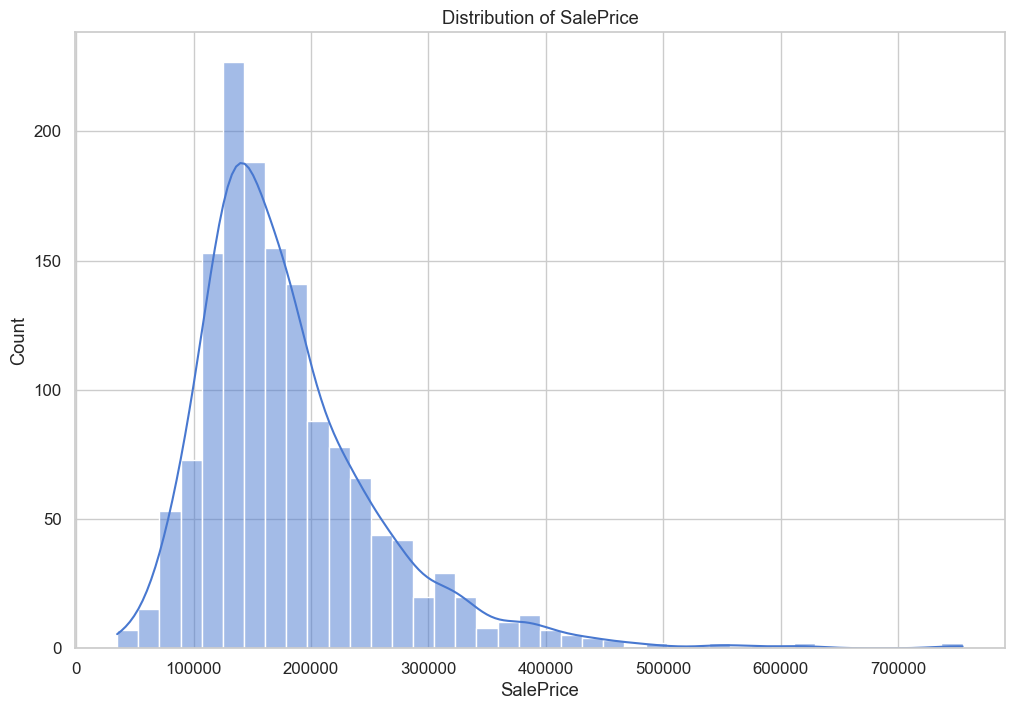

In [11]:
# Step 5 target variable analysis 

# Distribution of saleprice (target variable)

plt.figure(figsize=(12,8))
sns.histplot(train_df['SalePrice'], kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.show()

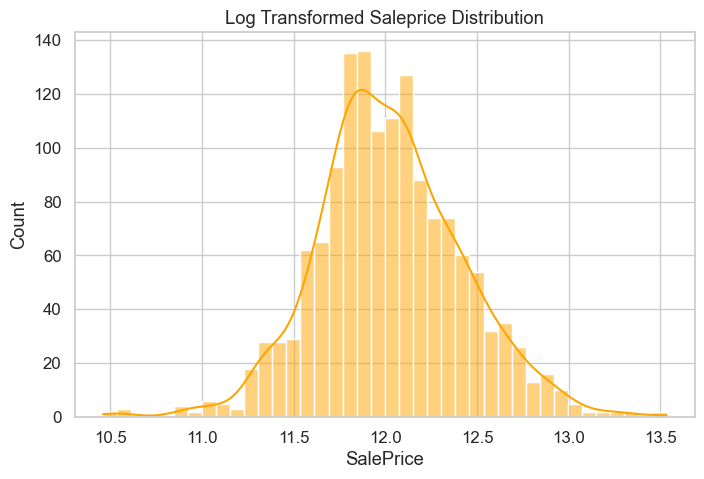

In [12]:
# Log transformation check for normality 

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train_df['SalePrice']), kde=True, bins=40, color='orange')
plt.title("Log Transformed Saleprice Distribution")
plt.show() 

In [13]:
# Step 6 Numerical vs Categorical Features 

num_features = train_df.select_dtypes(include=['int64','float64']).columns 
cat_features = train_df.select_dtypes(include=['object']).columns 

print(f"Numerical Features: {len(num_features)}")
print(f"Categorical Features: {len(cat_features)}")

Numerical Features: 38
Categorical Features: 43


In [ ]:
num_features 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

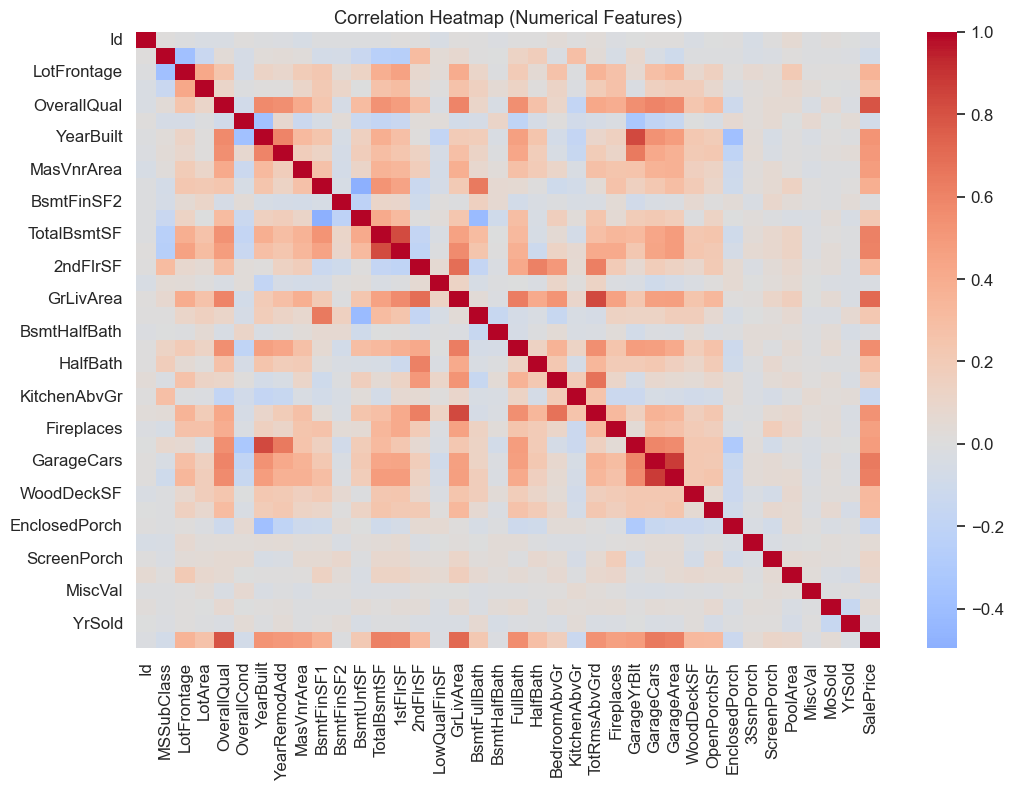

In [14]:
# Computing corr with target variable 

corr = train_df[num_features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [15]:
top_corr = corr['SalePrice'].sort_values(ascending=False).head(15)
print("Top correlated features with Saleprice:")
print(top_corr)

Top correlated features with Saleprice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


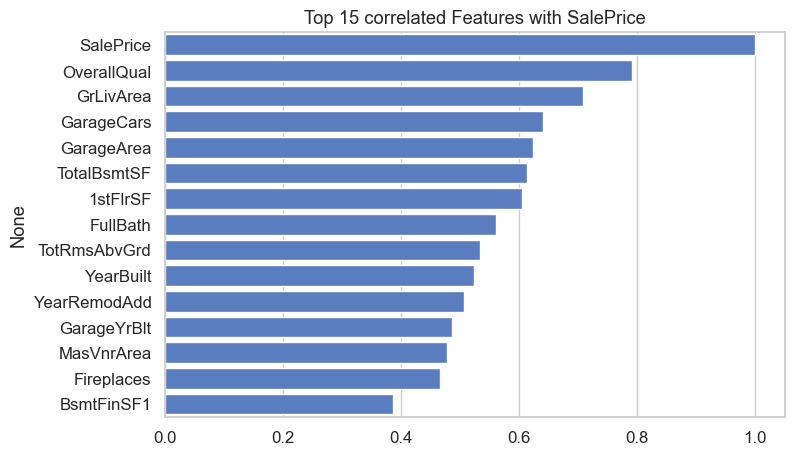

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y= top_corr.index)
plt.title("Top 15 correlated Features with SalePrice")
plt.show()

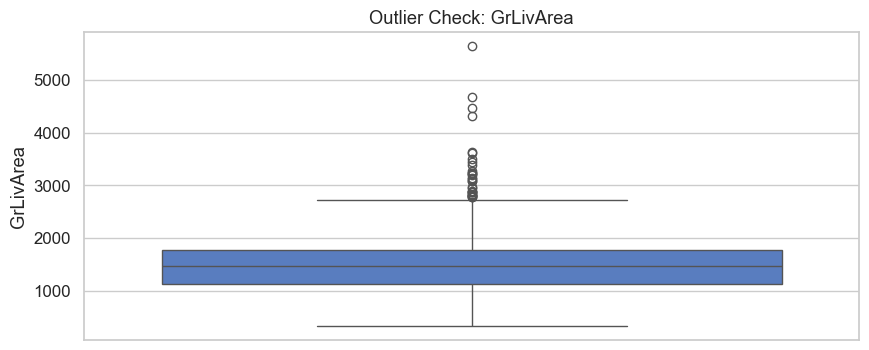

In [17]:
# Step Outlier Detection 

plt.figure(figsize=(10,4))
sns.boxplot(train_df['GrLivArea'])
plt.title("Outlier Check: GrLivArea")
plt.show()

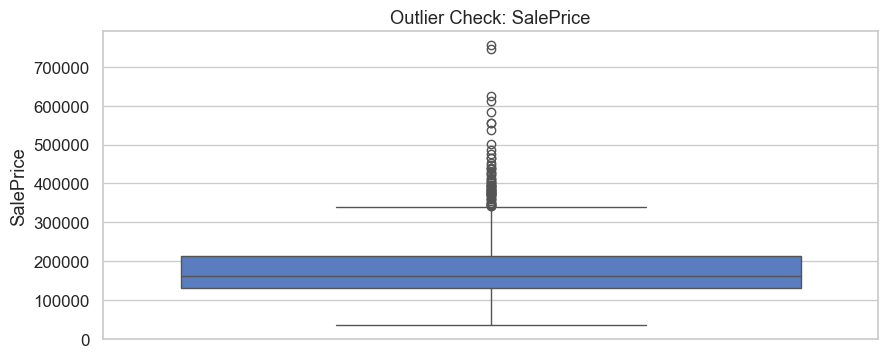

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(train_df['SalePrice'])
plt.title("Outlier Check: SalePrice")
plt.show()

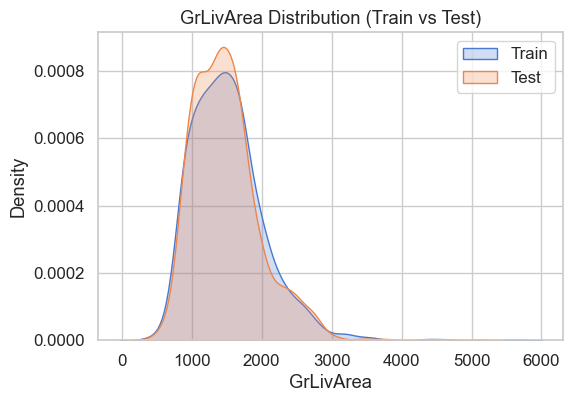

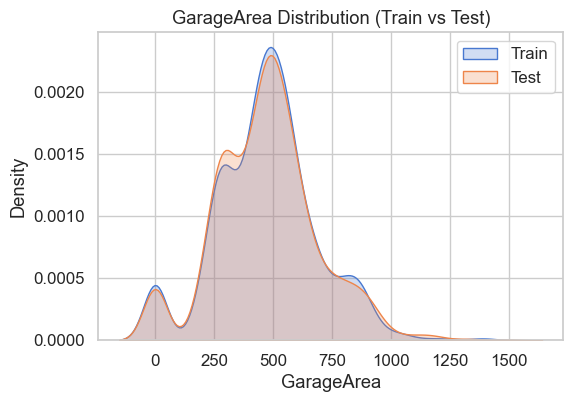

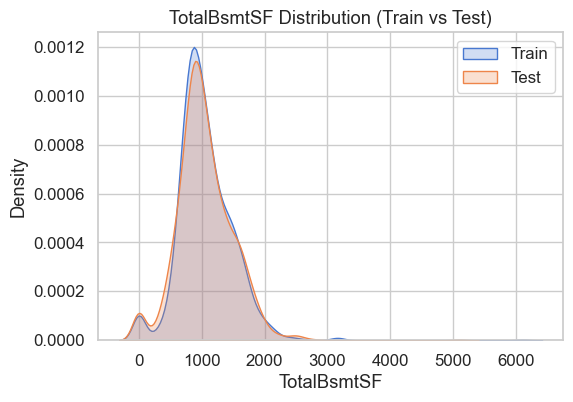

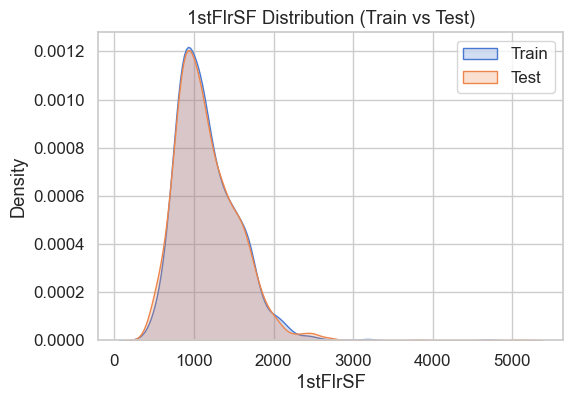

In [19]:
# Comparing few numerical feature distributions bw train adn test

for col in ['GrLivArea', 'GarageArea','TotalBsmtSF','1stFlrSF']:
    plt.figure(figsize=(6,4))
    
    sns.kdeplot(train_df[col], label='Train', fill=True)
    sns.kdeplot(test_df[col], label = 'Test', fill=True)
    plt.title(f"{col} Distribution (Train vs Test)")
    plt.legend()
    plt.show()